# Libraries

In [ ]:
!pip install -q pyLDAvis==2.1.2 # per far andare pyLDAvis.gensim

In [ ]:
# Importing modules
import pandas as pd
import os
import re
import numpy as np
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
#from wordcloud import WordCloud

# Don't print warnings
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

from __future__ import print_function

import pyLDAvis
import pyLDAvis.sklearn
import pyLDAvis.gensim
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
pyLDAvis.enable_notebook()
import gensim
from gensim.models import CoherenceModel

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') 
nltk.download('omw-1.4')
STOPWORDS = set(stopwords.words('english'))
PUNCTUATIONS = string.punctuation

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Read preprocessed CSV

In [ ]:
def read_preprocessed(filename):
  df = pd.read_csv(filename, sep='|')
  df['text'] = df['text'].apply(lambda x: x[1:-1].replace('\'', '').split(', '))
  return df

In [ ]:
# df=read_preprocessed("/content/gdrive/MyDrive/UNI/TextMining/preprocessed_articles.csv")
df=read_preprocessed("/content/gdrive/MyDrive/UNI/TextMining/preprocessed_articles.csv")

In [ ]:
# #metto assieme parole
# df["text"] = [' '.join(d) for d in list(df.text)]
# df

# Prepare data for Topic Modeling GENSIM

In [ ]:
# texts = list(df.text.str.split())
texts = list(df.text)

In [ ]:
dictionary = Dictionary(texts)
dictionary.filter_extremes(no_below=10, no_above=0.5)

In [ ]:
import gensim.corpora as corpora

id2word = corpora.Dictionary(texts)

In [ ]:
id2word[15]

'address'

In [ ]:
#[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

In [ ]:
len(dictionary)

49781

creo corpus

In [ ]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [ ]:
doc_id = 5
print(texts[doc_id][:10])
print(corpus[doc_id][:10])

['thousand', 'saturday', 'fled', 'area', 'southwestern', 'ivory', 'coast', 'attack', 'left', 'seven']
[(0, 3), (3, 1), (11, 4), (12, 1), (21, 1), (50, 7), (57, 1), (78, 1), (81, 1), (91, 1)]


In [ ]:

print(texts[:10])
print(corpus[:10])

[['official', 'hour', 'announcing', 'belief', 'military', 'action', 'syrian', 'target', 'right', 'step', 'take', 'alleged', 'use', 'chemical', 'weapon', 'proposed', 'legislation', 'obama', 'asks', 'congress', 'approve', 'use', 'military', 'force', 'to', 'deter', 'disrupt', 'prevent', 'degrade', 'potential', 'future', 'us', 'chemical', 'weapon', 'weapon', 'mass', 'destruction', 'step', 'set', 'turn', 'international', 'crisis', 'fierce', 'domestic', 'political', 'battle', 'key', 'question', 'looming', 'debate', 'happens', 'congress', 'vote', 'no', 'syrian', 'government', 'react', 'televised', 'address', 'white', 'house', 'rose', 'garden', 'earlier', 'saturday', 'president', 'said', 'would', 'take', 'case', 'congress', 'want', 'to', 'while', 'believe', 'authority', 'carry', 'military', 'action', 'without', 'specific', 'congressional', 'authorization', 'know', 'country', 'stronger', 'take', 'course', 'action', 'even', 'effective', 'said', 'we', 'debate', 'issue', 'big', 'business', 'usual'

In [ ]:
# [(dictionary[k], v) for k, v in corpus[0][:5]]

# Prova cusim

# Optimize number of clusters

In [ ]:
num_topics = [6,8,10,12,14,16]
perplexities = []
coherences = []

for i in num_topics:
    tmp = LdaModel(corpus, id2word=id2word, num_topics=i)

    perplexity = tmp.log_perplexity(corpus)
    coherence = CoherenceModel(model=tmp, texts=texts, dictionary=id2word, coherence='c_v').get_coherence()

    perplexities.append(perplexity)
    coherences.append(coherence)
    del tmp
    print('done', i)

done 6
done 8
done 10
done 12
done 14
done 16


In [ ]:
# PERPLEXITY
# the lower, the better

# COHERENCE
# 0.3 is bad
# 0.4 is low
# 0.5-6 is okay
# 0.7 is nice
# 0.8-9 is unlikely and probably wrong

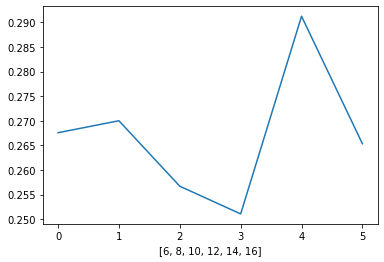

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(perplexities)
plt.plot(coherences)
plt.xlabel(num_topics)
plt.show()

In [ ]:
#print(" 6 topics:    coherence score: "+coherences[0])#+" Perplexity: "+perplexities[0])
print("6 topics  obtained %s Perplexity with %s Coherence Score." % (perplexities[0],coherences[0]))
print("8 topics  obtained %s Perplexity with %s Coherence Score." % (perplexities[1],coherences[1]))
print("10 topics  obtained %s Perplexity with %s Coherence Score." % (perplexities[2],coherences[2]))
print("12 topics  obtained %s Perplexity with %s Coherence Score." % (perplexities[3],coherences[3]))
print("14 topics  obtained %s Perplexity with %s Coherence Score." % (perplexities[4],coherences[4]))
print("16 topics  obtained %s Perplexity with %s Coherence Score." % (perplexities[5],coherences[5]))


6 topics  obtained -8.470270965820438 Perplexity with 0.26757746683602496 Coherence Score.
8 topics  obtained -8.426501655062236 Perplexity with 0.2700064083377528 Coherence Score.
10 topics  obtained -8.397022018175155 Perplexity with 0.2567109279544352 Coherence Score.
12 topics  obtained -8.38121084863936 Perplexity with 0.25108267182940064 Coherence Score.
14 topics  obtained -8.358551427847994 Perplexity with 0.291235640952536 Coherence Score.
16 topics  obtained -8.341299696456284 Perplexity with 0.26533762000919475 Coherence Score.


# Fit LDA model 

In [ ]:
lda_gensim = LdaModel(corpus,id2word=id2word,num_topics=14)#id2word=id2word

In [ ]:
#SALVATAGGIO MDOELLO
import joblib
joblib.dump(lda_gensim, '/content/gdrive/MyDrive/UNI/TextMining/lda_model_gensim_14_id2word.jl')

['/content/gdrive/MyDrive/UNI/TextMining/lda_model_gensim_14.jl']

In [ ]:
 #importo
 import joblib
 lda_model_gensim = joblib.load('/content/gdrive/MyDrive/UNI/TextMining/lda_model_gensim_14_id2word.jl')

valuto coerenza modello

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model_gensim.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_gensim, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.383896825044214

Coherence Score:  0.26552946603618843


In [ ]:
def format_topics_sentences(ldamodel=lda_model_gensim, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_gensim, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

In [ ]:
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,2.0,0.4841,"government, al, attack, menendez, country, gro...","[official, hour, announcing, belief, military,..."
1,1,7.0,0.6607,"whether, seriously, floor, game, english, succ...","[usain, bolt, rounded, world, championship, su..."
2,2,11.0,0.3123,"bicycle, 787, let, 25, represented, kitsap, bu...","[kansa, city, missouri, general, service, admi..."
3,3,1.0,0.5429,"concert, bizarre, case, theory, picked, initia...","[los, angeles, medical, doctor, vancouver, bri..."
4,4,1.0,0.8540,"concert, bizarre, case, theory, picked, initia...","[police, arrested, another, teen, thursday, si..."
5,5,2.0,0.8399,"government, al, attack, menendez, country, gro...","[thousand, saturday, fled, area, southwestern,..."
6,6,9.0,0.5736,"noted, praising, speaker, repeated, horror, gw...","[four, group, advocate, immigrant, right, said..."
7,7,9.0,0.8555,"noted, praising, speaker, repeated, horror, gw...","[labor, day, unofficial, end, summer, also, un..."
8,8,2.0,0.5716,"government, al, attack, menendez, country, gro...","[gaza, city, italian, humanitarian, activist, ..."
9,9,12.0,0.5134,"human, level, issue, get, experienced, key, de...","[renowned, radio, personality, casey, kasem, c..."


In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head(15)

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.9914,"considerable, rated, bund, rodriguez, vendor, ...","[dozen, people, died, heavy, rain, caused, flo..."
1,1.0,0.9969,"concert, bizarre, case, theory, picked, initia...","[three, year, suspected, cop, killer, died, so..."
2,2.0,0.9983,"government, al, attack, menendez, country, gro...","[israel, issued, rare, statement, regret, rece..."
3,3.0,0.9968,"investigation, benefit, demonstrate, 000, acco...","[world, health, organization, want, stop, eati..."
4,4.0,0.9771,"table, dimly, majority, homicide, 41, child, r...","[headline, call, attention, a, gender, reversa..."
5,5.0,0.9941,"taking, occupant, human, represents, load, thu...","[yet, another, reason, fan, the, voice, get, h..."
6,6.0,0.9953,"defendant, applicant, cnn, et, speaker, 84, be...","[blizzard, roared, much, southern, rockies, ce..."
7,7.0,0.9976,"whether, seriously, floor, game, english, succ...","[european, champion, league, holder, bayern, m..."
8,8.0,0.9898,"china, heart, admitted, periphery, walking, pr...","[may, 31, 2013, download, pdf, map, related, t..."
9,9.0,0.9978,"noted, praising, speaker, repeated, horror, gw...","[washington, republican, wrested, control, hou..."


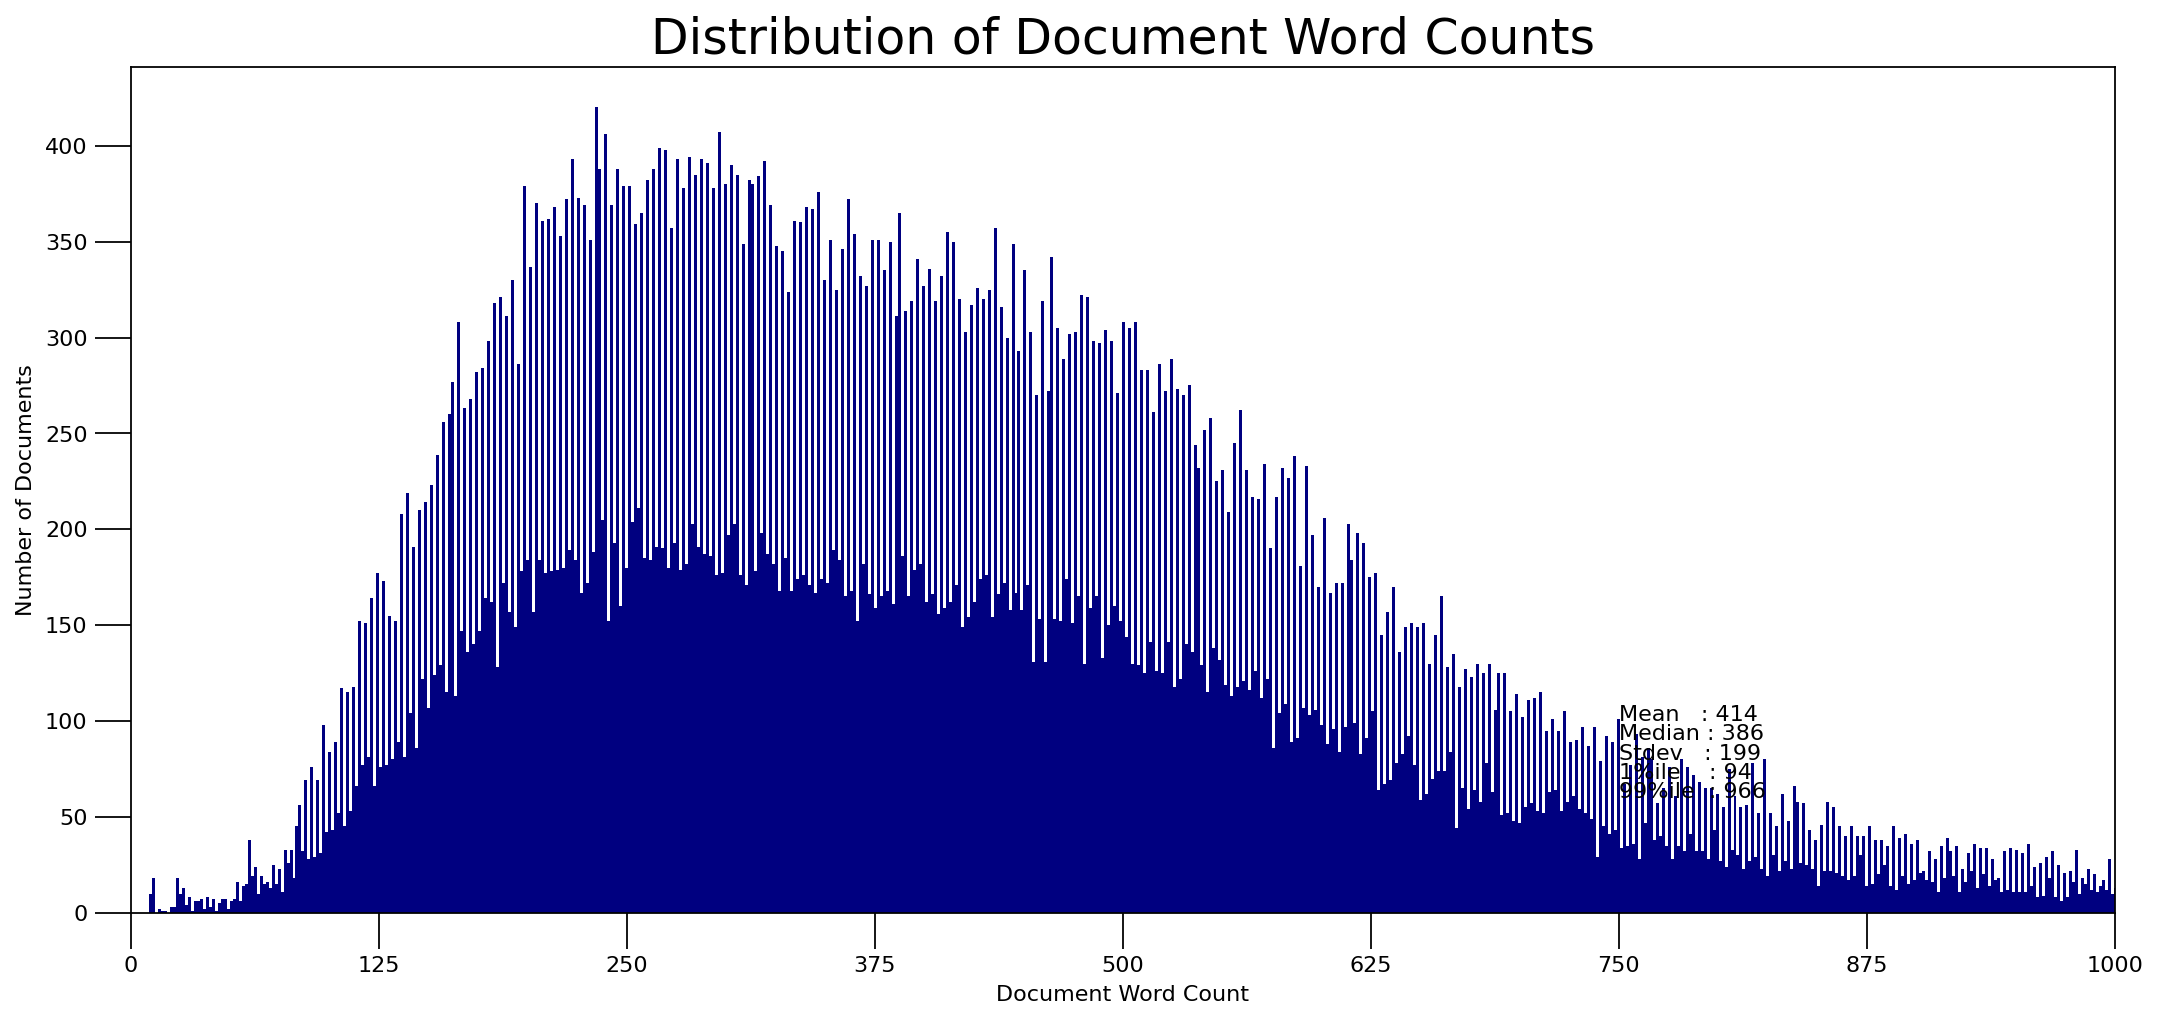

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

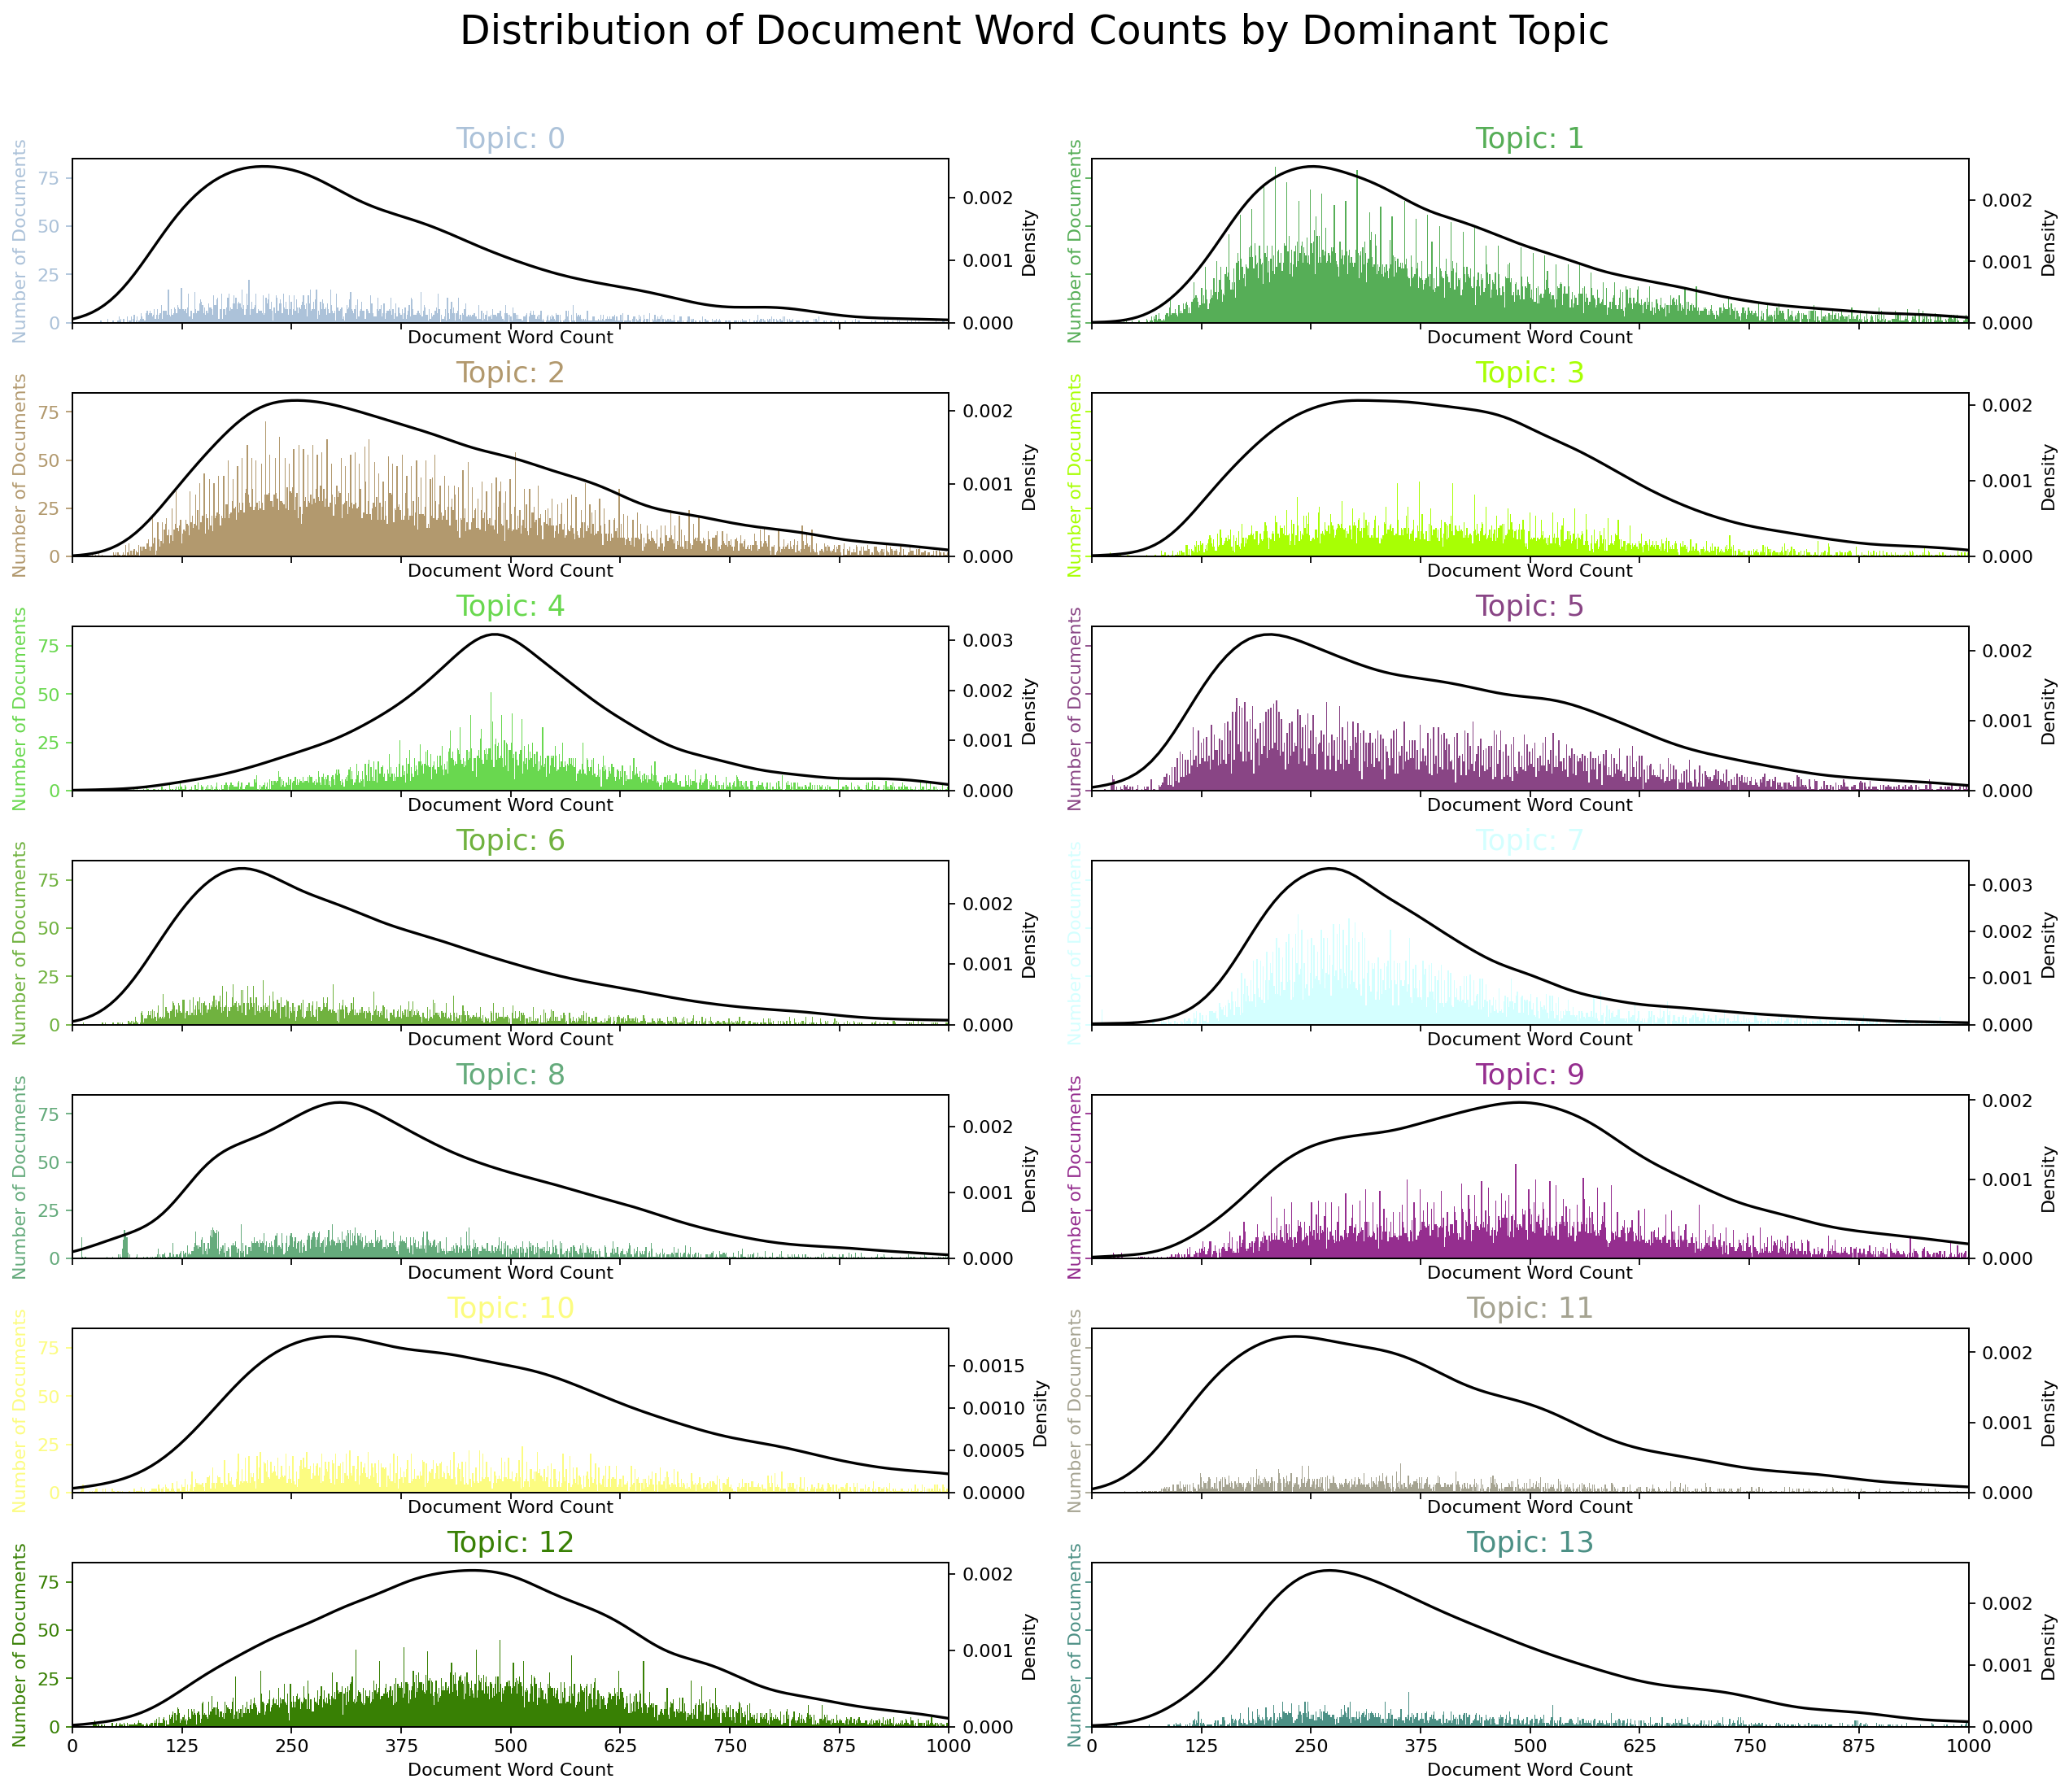

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(7,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

# Visualizations

In [ ]:
pyLDAvis.gensim.prepare(lda_model_gensim, corpus, dictionary, mds='tsne',sort_topics=False)

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
0        1.425140 -203.131439       1        1   5.664878
1       93.696953  -55.018154       2        1   9.783081
2      141.694016   25.320429       3        1   7.017675
3     -126.233505    5.739788       4        1   5.888383
4      -59.868134  101.519302       5        1   4.925599
5      151.966629  133.119141       6        1   5.870001
6       12.542690 -101.441658       7        1   4.894766
7       49.372585   57.773476       8        1   7.264722
8      203.505997  -84.541840       9        1   7.158302
9      119.923477 -166.068970      10        1   9.118661
10     -19.315592   -8.882428      11        1   6.494647
11     -95.841057 -109.373474      12        1   7.625867
12      37.554749  165.057098      13        1   4.285943
13     243.648911   32.733547      14        1  14.007475, topic_info=           Term          Freq         Total Category  logprob  loglift
1199     police  74789.000000  74789.000000  Default  30.0000  30.0000
289       obama  55237.000000  55237.000000  Default  29.0000  29.0000
309   president  75674.000000  75674.000000  Default  28.0000  28.0000
982       court  41176.000000  41176.000000  Default  27.0000  27.0000
22           al  36560.000000  36560.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
159        even  18494.855528  53166.865794  Topic14  -5.5958   0.9096
93          cnn  22483.475879  99292.070914  Topic14  -5.4005   0.4803
517         day  21658.861738  89684.612801  Topic14  -5.4379   0.5447
111       could  18364.105633  80040.764874  Topic14  -5.6029   0.4934
485        back  17102.975473  54825.616597  Topic14  -5.6741   0.8007

[1251 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
1980       1  0.010968      0
1980       2  0.003300      0
1980       3  0.003882      0
1980       4  0.051831      0
1980       6  0.034069      0
...      ...       ...    ...
20315      9  0.012872  zhang
43777      6  0.996262  zhong
3669       2  0.977690      ©
3669       4  0.013268      ©
3669      14  0.008293      ©

[6649 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

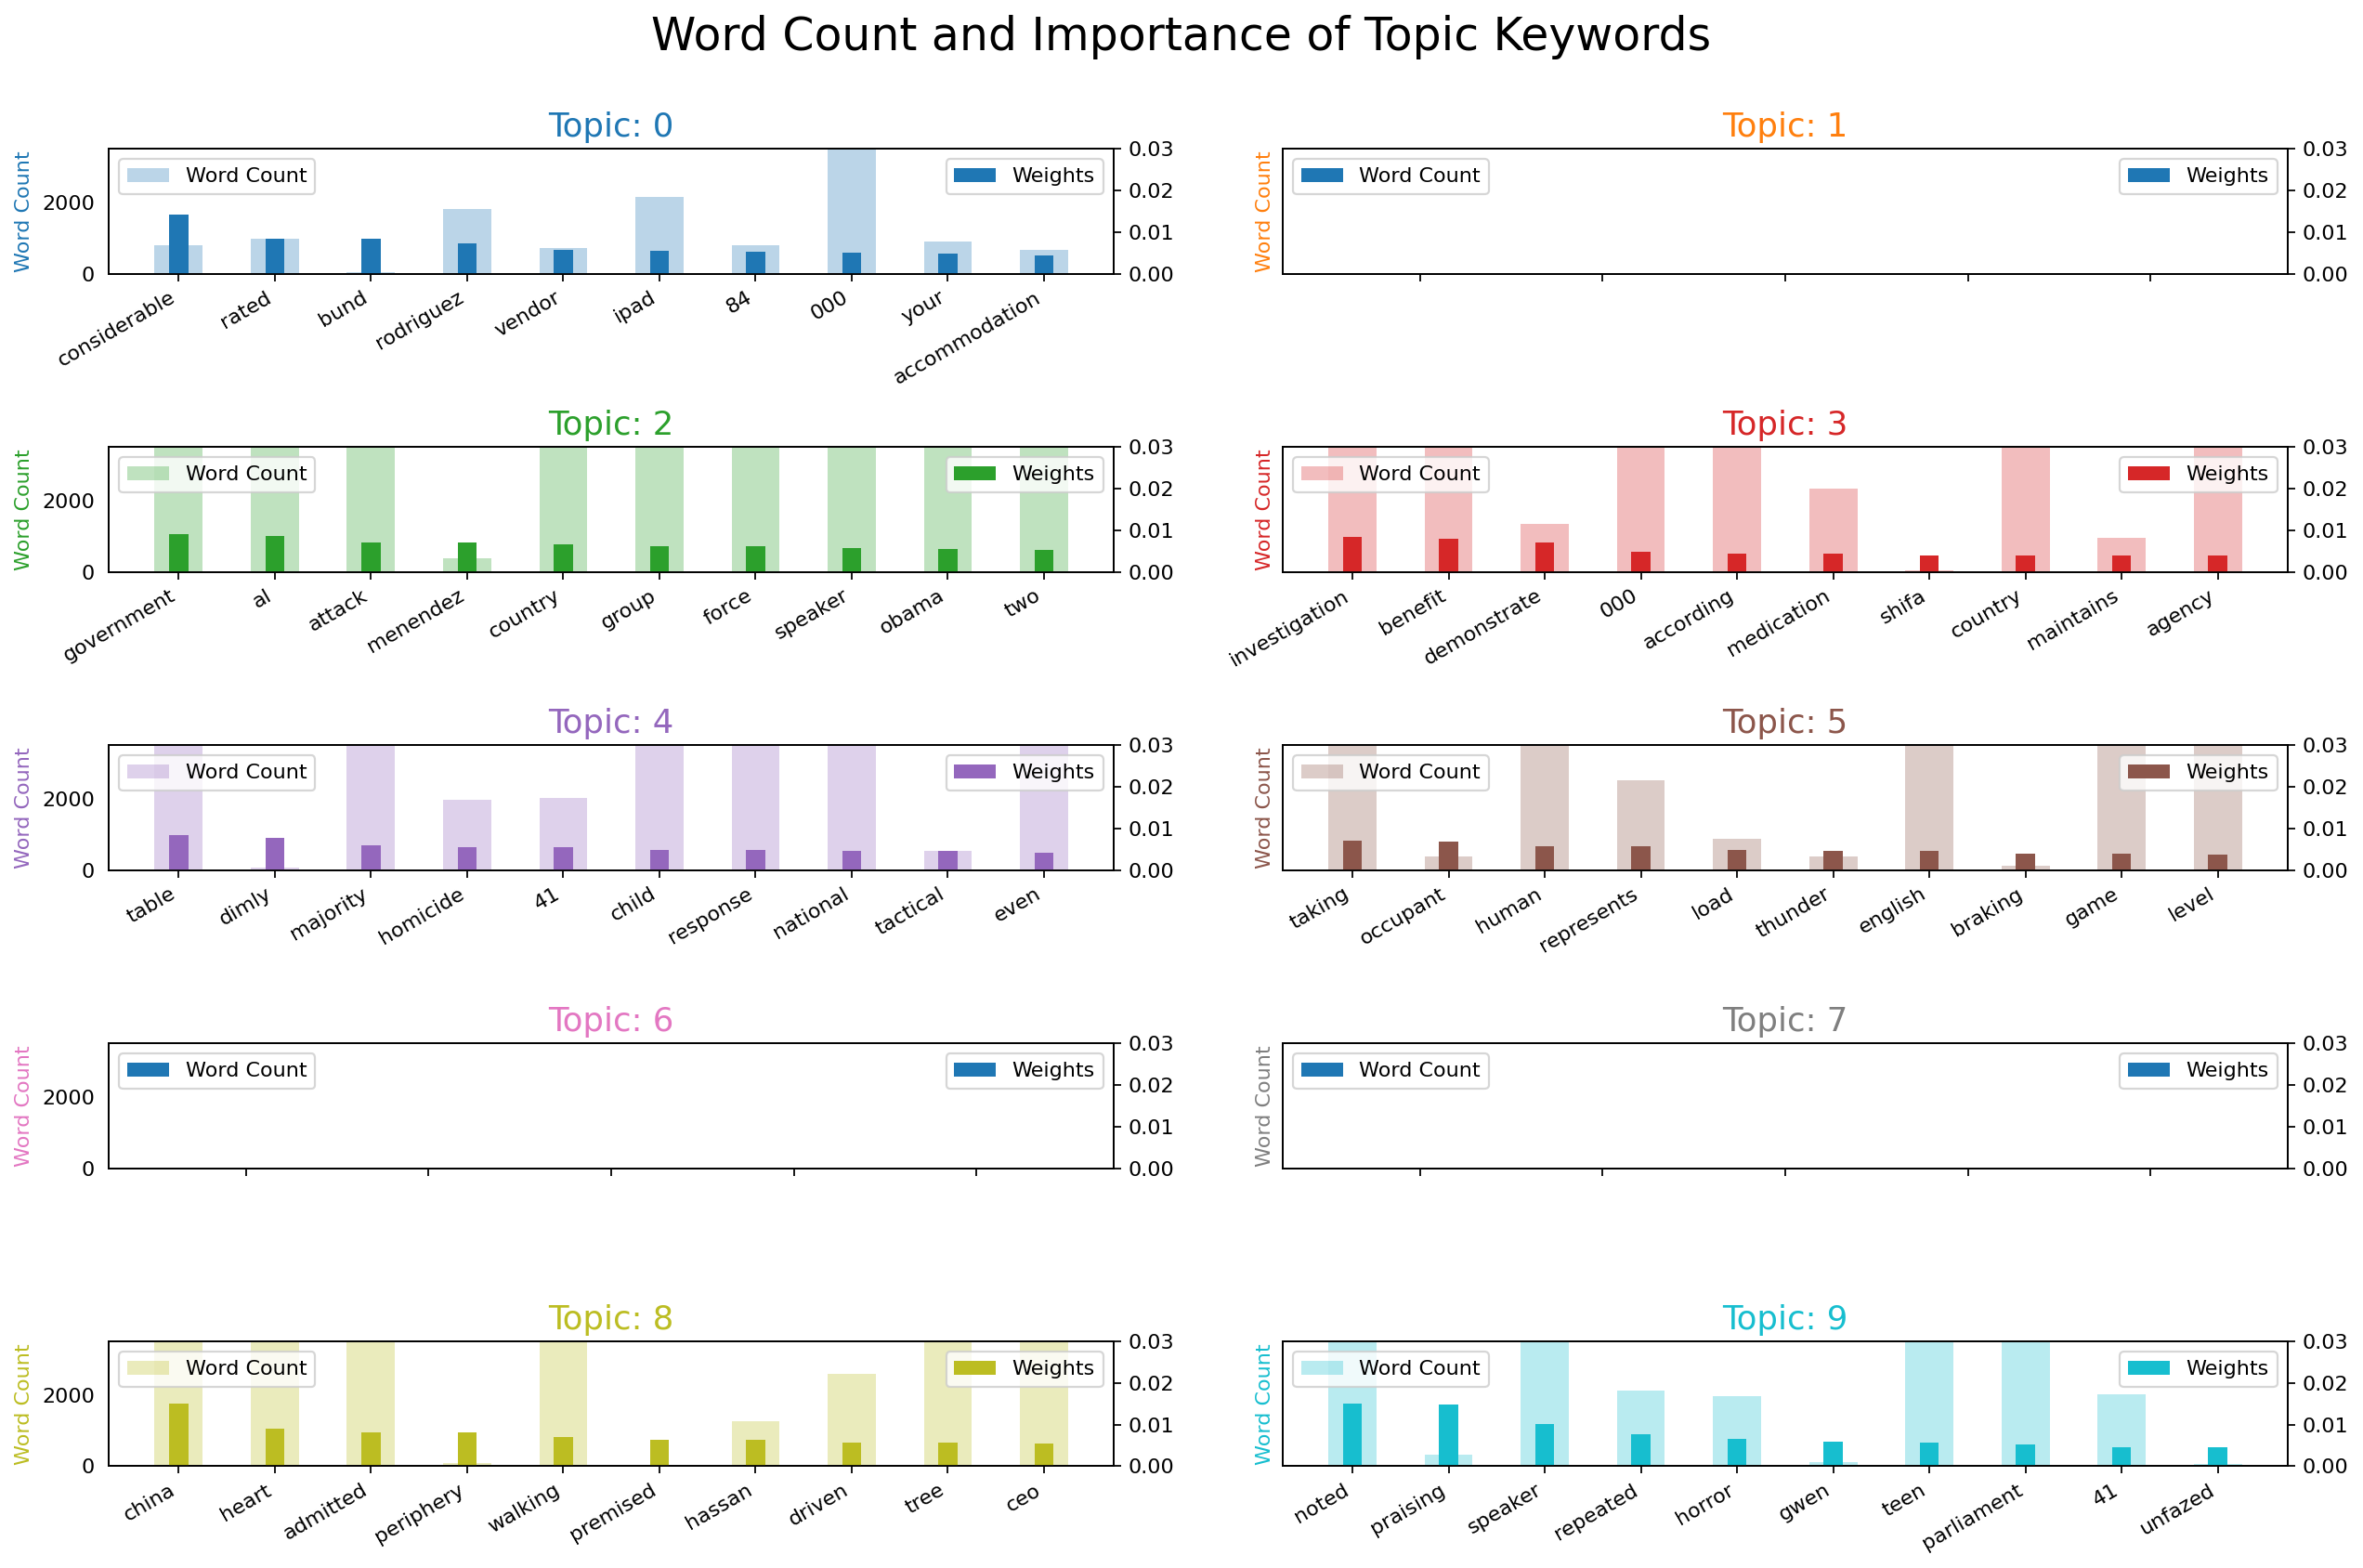

In [ ]:
from collections import Counter
topics = lda_model_gensim.show_topics(formatted=False)
data_flat = [w for w_list in texts for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

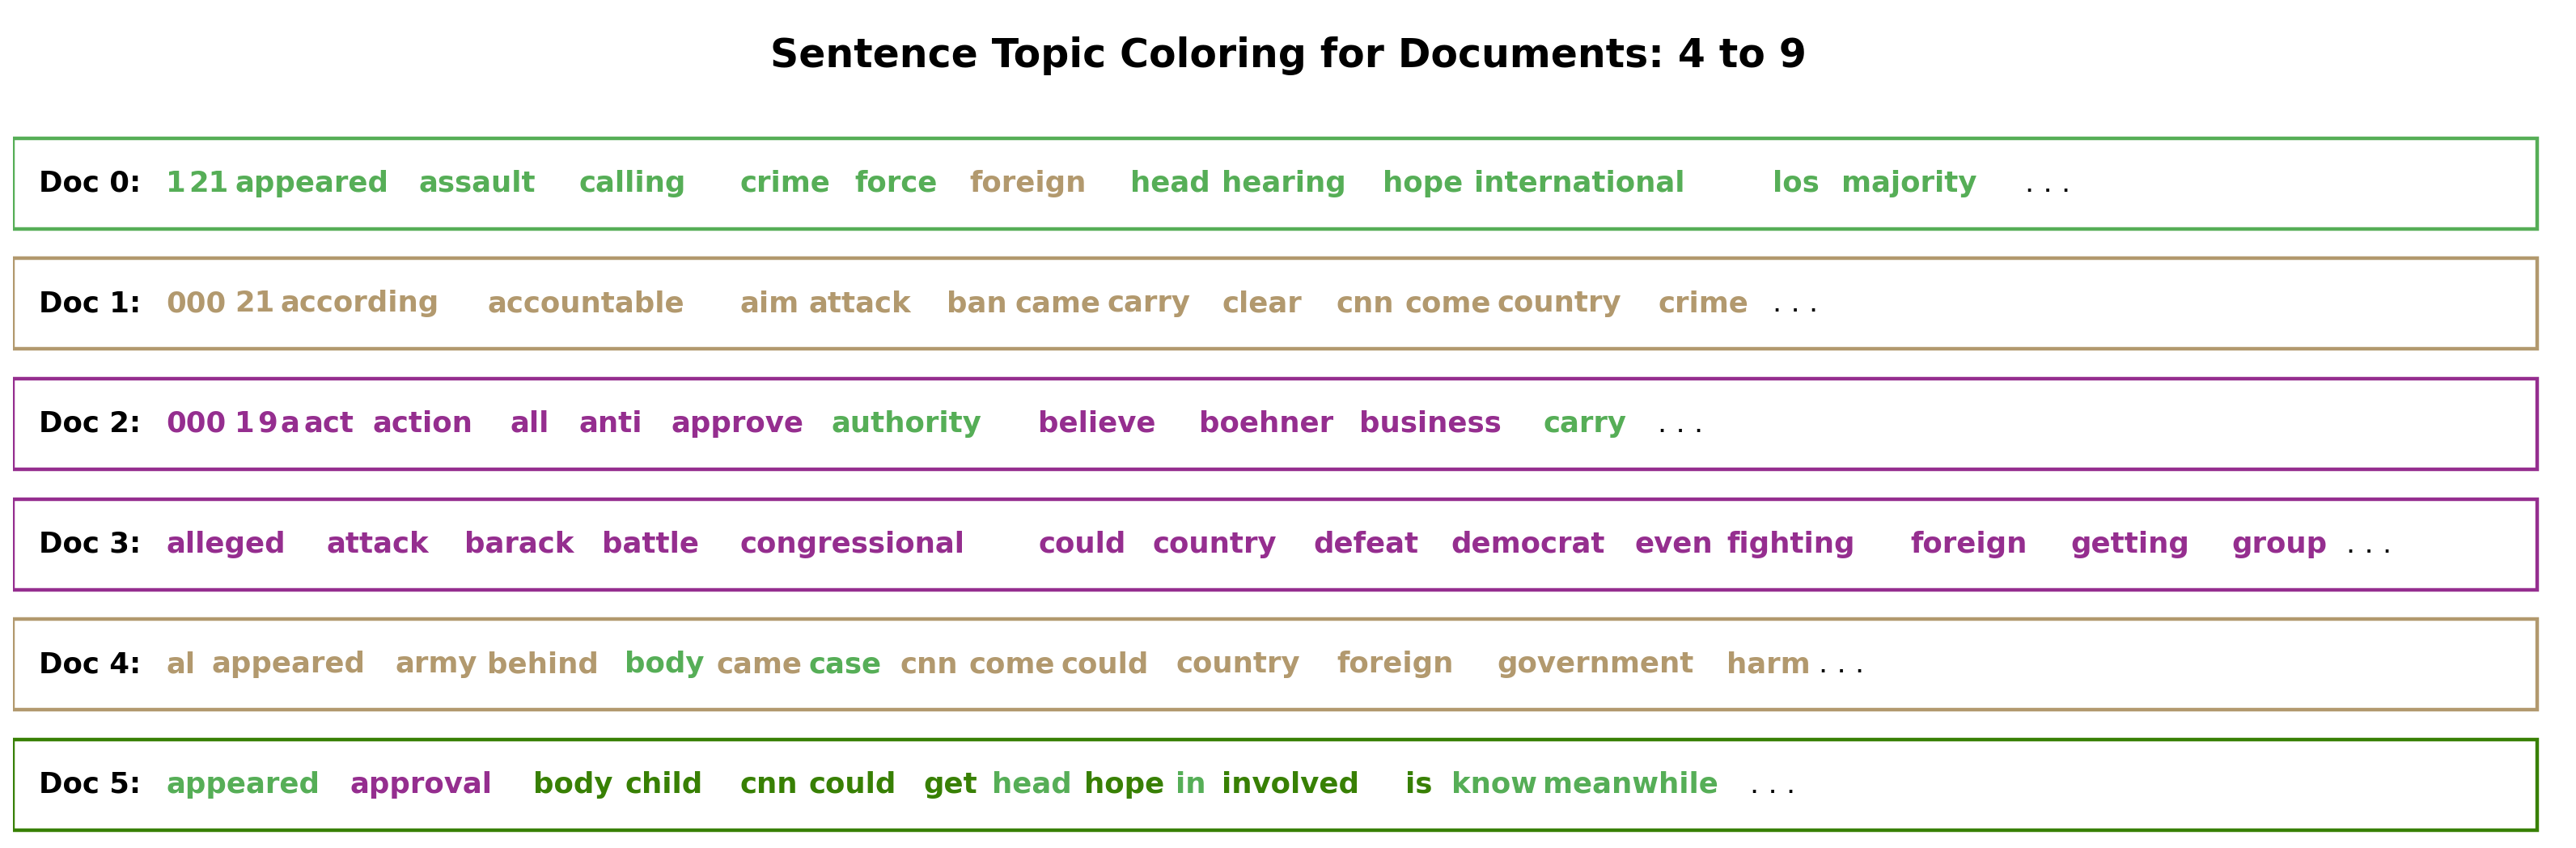

In [ ]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model_gensim, corpus=corpus, start = 4, end = 11):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.XKCD_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 

            #topic_percs = model[corp]

            topic_percs, wordid_topics, wordid_phivalues = lda_model.get_document_topics(corp_cur, per_word_topics = True)

            #topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart() 

In [ ]:
for top in lda_model_gensim.print_topics(50):
  print(top)

(0, '0.014*"concert" + 0.007*"case" + 0.007*"bizarre" + 0.006*"theory" + 0.005*"picked" + 0.005*"according" + 0.005*"repeat" + 0.005*"cnn" + 0.005*"authority" + 0.005*"immigration"')
(1, '0.009*"benefit" + 0.008*"investigation" + 0.004*"business" + 0.004*"january" + 0.004*"000" + 0.004*"build" + 0.004*"general" + 0.004*"music" + 0.003*"agency" + 0.003*"unacceptable"')
(2, '0.006*"considerable" + 0.005*"speaker" + 0.005*"bicycle" + 0.004*"84" + 0.004*"according" + 0.004*"000" + 0.004*"cnn" + 0.004*"obama" + 0.004*"787" + 0.004*"clarify"')
(3, '0.006*"fell" + 0.005*"2005" + 0.005*"applicant" + 0.005*"whether" + 0.004*"windsor" + 0.004*"level" + 0.004*"homicide" + 0.004*"absolutely" + 0.004*"market" + 0.003*"fombu"')
(4, '0.008*"occupant" + 0.007*"taking" + 0.006*"represents" + 0.005*"thunder" + 0.005*"load" + 0.004*"revealing" + 0.004*"disc" + 0.004*"braking" + 0.004*"english" + 0.003*"adhere"')
(5, '0.013*"human" + 0.008*"level" + 0.007*"issue" + 0.006*"experienced" + 0.006*"child" + 0.

In [ ]:
lda_model_gensim.print_topic(0)

'0.014*"concert" + 0.007*"case" + 0.007*"bizarre" + 0.006*"theory" + 0.005*"picked" + 0.005*"according" + 0.005*"repeat" + 0.005*"cnn" + 0.005*"authority" + 0.005*"immigration"'

In [ ]:
lda_model_gensim.show_topics(formatted=False, num_topics=10,num_words=30)

[(0,
  [('concert', 0.014016727),
   ('case', 0.00726782),
   ('bizarre', 0.0068806983),
   ('theory', 0.0062126652),
   ('picked', 0.0053309593),
   ('according', 0.0049372315),
   ('repeat', 0.0048489505),
   ('cnn', 0.0048424215),
   ('authority', 0.0048007746),
   ('immigration', 0.004786804),
   ('appears', 0.004523931),
   ('diego', 0.0042809797),
   ('speaker', 0.004165245),
   ('deal', 0.004149292),
   ('16', 0.00402935),
   ('specific', 0.0039148214),
   ('initially', 0.0039104656),
   ('foia', 0.003660653),
   ('maintains', 0.003426024),
   ('kiprop', 0.0032408778),
   ('hospital', 0.003114843),
   ('crime', 0.003099751),
   ('eye', 0.003090892),
   ('child', 0.0030657344),
   ('significantly', 0.0030603076),
   ('role', 0.003059645),
   ('city', 0.0030485964),
   ('manner', 0.0029914647),
   ('man', 0.0027769215),
   ('know', 0.0027659112)]),
 (1,
  [('benefit', 0.009080145),
   ('investigation', 0.00791765),
   ('business', 0.004331947),
   ('january', 0.0038553341),
   ('0

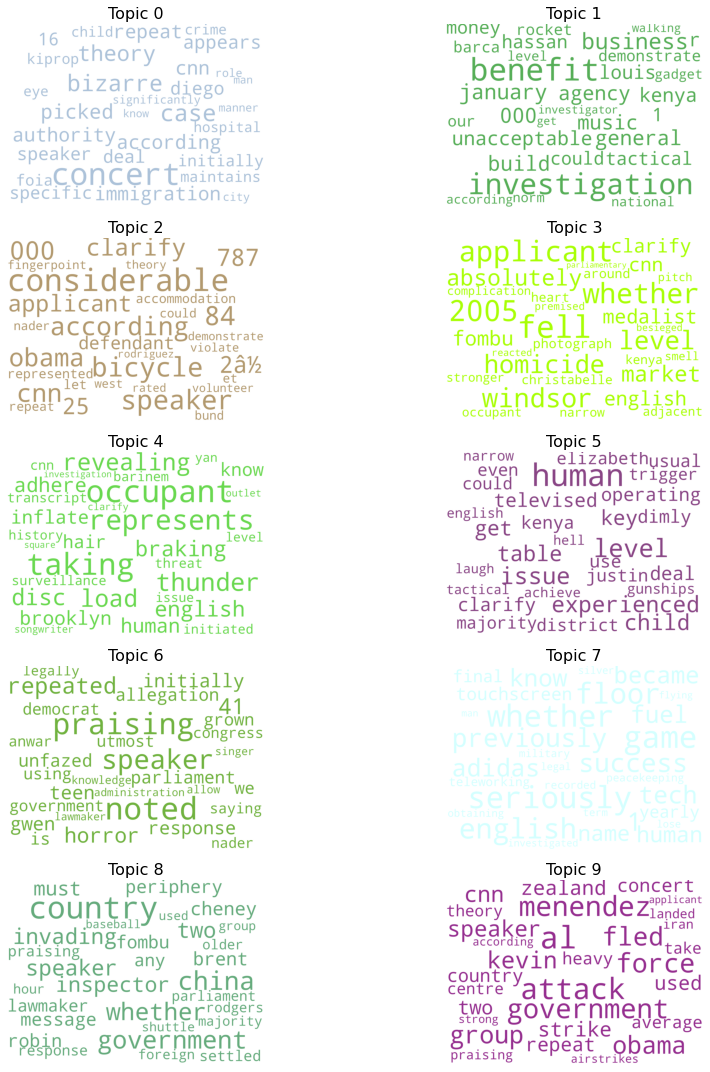

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.XKCD_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=30,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_gensim.show_topics(formatted=False, num_topics=10,num_words=30)

fig, axes = plt.subplots(5, 2, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    #print(i)
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()